In [88]:
#Задание 1
#Используем файл keywords.csv.
#Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону.
#Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона.
#Если поисковый запрос не содержит названия города, то ставим 'undefined'.

#Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

import pandas as pd

keywords = pd.read_csv('data/keywords.csv')

In [89]:
def geo_class(row):
    """ Функция обрабатывает словарь с ключами - регионами и значениями - списками городов, 
    возвращает регион, если город из соответствующего списка значение имеется в строке или возвращает
    'undefined, если ни одного из имеющихся в списке городов нет.'"""
    
    for keys, values in geo_data.items():
        for value in values:
            if value in row['keyword']:
                return keys
    return 'undefined'

In [90]:
keywords['region'] = keywords.apply(geo_class, axis=1)

keywords[(keywords['region'] == 'Центр') | (keywords['region'] == 'Северо-Запад') | (keywords['region'] == 'Дальний Восток')].head(5)

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


In [91]:
len(keywords[(keywords['region'] == 'Центр') | (keywords['region'] == 'Северо-Запад') | (keywords['region'] == 'Дальний Восток')])

747

In [92]:
#Задание 2
#Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
#    - оценка 2 и меньше - низкий рейтинг
#    - оценка 4 и меньше - средний рейтинг
#    - оценка 4.5 и 5 - высокий рейтинг

#Результат классификации запишите в столбец class


ratings = pd.read_csv('data/ratings.csv')
len(ratings['movieId'].unique())

53889

In [93]:
def rating_class(row):
    """Функция возвравщает класс рейтинга: 'low rating', если
    средний рейтинг фильма меньше 2, 'middle rating', если средний рейтинг
    лежит в пределах от 2 до 4 и 'high rating', если средний рейтинг фильма больше 4."""
    
    if row['rating'] <= 2:
        return 'low rating'
    elif 2 < row['rating'] <= 4:
        return 'middle rating'
    elif row['rating'] > 4:
        return 'high rating'

In [94]:
ratings = ratings[['movieId', 'rating']].groupby('movieId').mean().reset_index()
ratings['class'] = ratings.apply(rating_class, axis=1)

ratings.sort_values(by = 'rating', ascending=False).head(5)

,movieId,rating,class
43805,169338,5.0,high rating
51585,187729,5.0,high rating
45018,172149,5.0,high rating
40484,160966,5.0,high rating
30667,134387,5.0,high rating


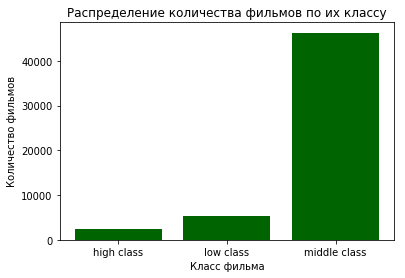

In [95]:
#изобразим на гистограмме какое количество фильмов обладает высоким, средним и низким классом.
movies_count = []
movies_count.append(len(ratings[(ratings['class'] == 'low rating')]))
movies_count.append(len(ratings[(ratings['class'] == 'middle rating')]))
movies_count.append(len(ratings[(ratings['class'] == 'high rating')]))

import matplotlib.pyplot as plt

plt.bar(['low class', 'middle class', 'high class'], movies_count, color='darkgreen')
plt.title('Распределение количества фильмов по их классу')
plt.xlabel('Класс фильма')
plt.ylabel('Количество фильмов')
plt.show()

In [76]:
#Задание 3
#Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). 
#Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя.
#Ответ дайте в днях.

ratings = pd.read_csv('data/ratings.csv')

In [77]:
userIds = ratings[['userId', 'rating']].groupby('userId').count()
userIds = userIds[userIds['rating']>100]
userIds = userIds.reset_index()

In [78]:
user_time = ratings[['userId', 'timestamp']].groupby('userId').agg(['min', 'max'])['timestamp']
user_time['Lifetime'] = (user_time['max'] - user_time['min'])/86400
user_time = user_time['Lifetime']
user_time = user_time.reset_index()

In [79]:
joined = pd.merge(userIds, user_time, on='userId', how='left')
joined.sort_values(by = 'Lifetime', ascending=True).head(5)
#существуют пользователи, которые за секунды поставили более 100 рейтингов

,userId,rating,Lifetime
6666,27972,106,0.000012
6228,26075,121,0.000012
17960,75796,141,0.000023
21599,91407,101,0.000023
64224,269878,121,0.000023


In [80]:
"""С помощью полученного датафрэйма joined можно, например, посмотреть какое количество
пользователей, поставивших более 100 рейтингов, каким облатает Lifetime-ом. Выберем, например, такое распределение
(от 0 до 1, от 1 до 5, от 5 до 50, от 50 до 500, от 500) дней. И найдем количество пользователей, которые имеют время жизни 
в этих пределах"""

users_count = []
users_count.append(len(joined[(joined['Lifetime'] < 1)]))
users_count.append(len(joined[(joined['Lifetime'] > 1) & (joined['Lifetime'] < 5)]))
users_count.append(len(joined[(joined['Lifetime'] > 5) & (joined['Lifetime'] < 50)]))
users_count.append(len(joined[(joined['Lifetime'] > 50) & (joined['Lifetime'] < 500)]))
users_count.append(len(joined[(joined['Lifetime'] > 500)]))

In [81]:
import matplotlib.pyplot as plt

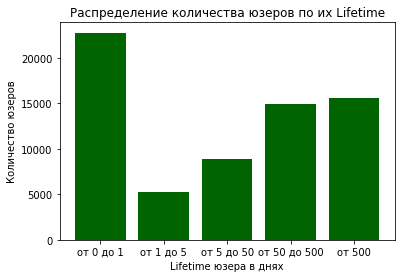

In [82]:
"""Эти данных можно для наглядности вывести на экран с помощью matplotlib. Видно, что более 20000 пользователей
поставили более 100 рейтингов имея Lifetime в пределах дня. Что заметно больше, чем количество пользователей с временем жизни
более 500-от дней. """

plt.bar(['от 0 до 1','от 1 до 5','от 5 до 50','от 50 до 500','от 500'], users_count, color=['darkgreen'])
plt.title('Распределение количества юзеров по их Lifetime')
plt.xlabel('Lifetime юзера в днях')
plt.ylabel('Количество юзеров')
plt.show()

In [83]:
"""Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас".
Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия.
Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска.
Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year'
и отсортируйте результат по убыванию рейтинга"""

import pandas as pd

movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

In [84]:
years = list(range(1950, 2010))

def production_year(row):
    for year in years:
        if str(year) in row['title']:
            return year
    return 1900

movies['year'] = movies.apply(production_year, axis=1)
movies = movies[(movies['year'] >= 1950) & (movies['year'] <= 2010)]

joined = movies.merge(ratings, on='movieId', how='left')
joined = joined[['rating', 'year']].groupby('year').mean()

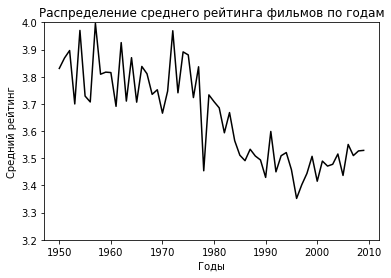

In [85]:
joined = joined.reset_index()

plt.plot(joined['year'], joined['rating'], c='k')
plt.title('Распределение cреднего рейтинга фильмов по годам')
plt.xlabel('Годы')
plt.ylabel('Средний рейтинг')
plt.ylim(bottom = 3.2, top = 4)
plt.show()

Как видно, существует некоторая тенденция к уменьшению рейтинга

In [86]:
joined.sort_values(by = 'rating', ascending=True).head(7)

,year,rating
46,1996,3.352208
47,1997,3.402396
50,2000,3.415536
40,1990,3.429585
55,2005,3.436769
48,1998,3.444026
42,1992,3.450034
